<a href="https://colab.research.google.com/github/JulioClemente/JulioClemente/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import graphviz

[link dos dados](https://github.com/JulioClemente/machine/blob/main/vinhos%20DIR/red%20vinho/winequality-red.csv)

# Testes do modelo de **LinearRegression**

In [2]:
wine_red = pd.read_csv('winequality-red.csv',delimiter=';')
test_new_winered = wine_red[['citric acid','alcohol','sulphates','quality']]

In [3]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    test_new_winered.drop(['quality'], axis=1),
    test_new_winered['quality'])


In [4]:
model = LinearRegression()
model = model.fit(predictors_train, target_train)
target_predicted = model.predict(predictors_test)

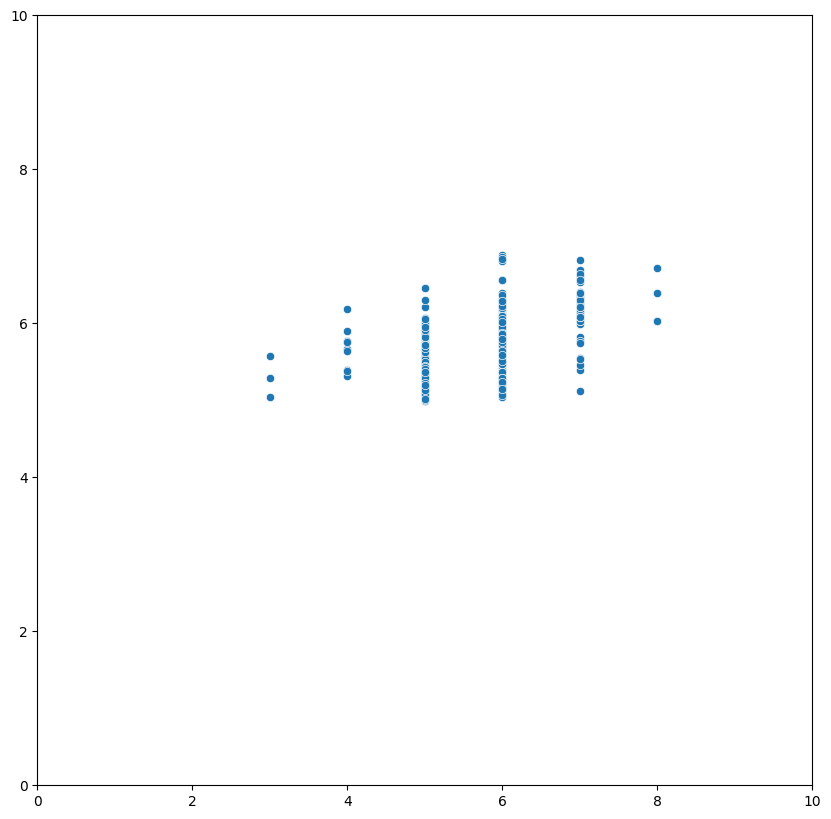

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(10,10))
graph = sns.scatterplot(x=target_test.values,y=target_predicted)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()
plt.savefig("Modelo_linear_1.png", dpi=300, bbox_inches='tight')

In [6]:
erro_quadrado = mean_squared_error(target_test,target_predicted)
erro_quadrado * 100

43.76543004103176

In [7]:
r2_erro = r2_score(target_test,target_predicted)
r2_erro * 100

28.6561644143709

# Teste com modelo **LinearRegression** 2





In [8]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    wine_red.drop(['quality'], axis=1),
    wine_red['quality'])

In [9]:
model = LinearRegression()
model = model.fit(predictors_train, target_train)
target_predicted1 = model.predict(predictors_test)

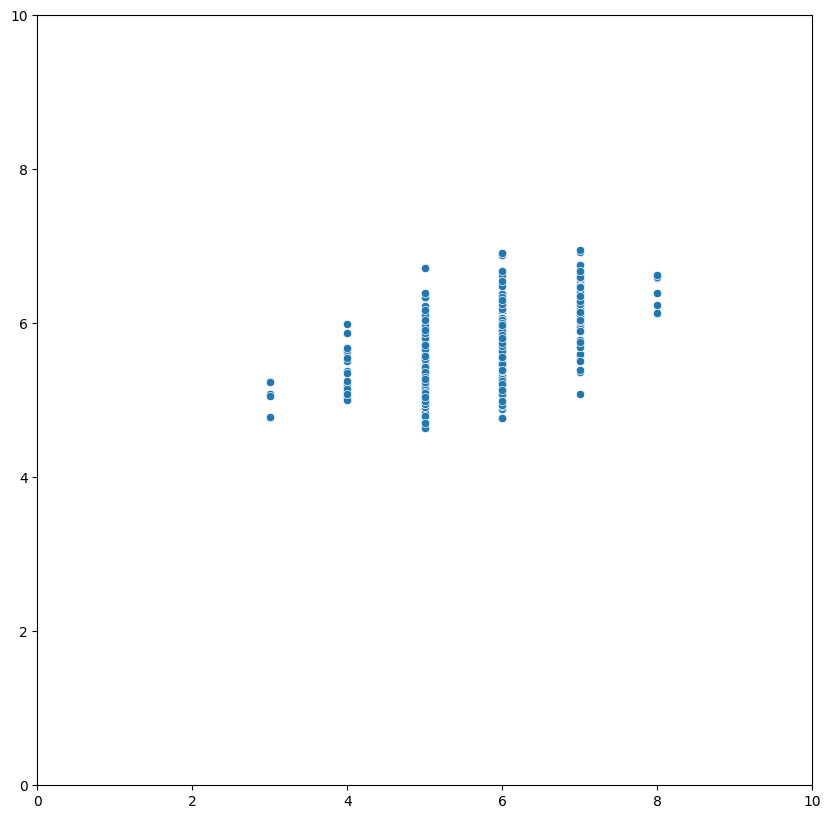

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(10,10))
graph = sns.scatterplot(x=target_test.values * 1,y=target_predicted1)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()
plt.savefig("Modelo_linear_2.png", dpi=300, bbox_inches='tight')

In [11]:
erro_quadrado1 = mean_squared_error(target_test,target_predicted)
erro_quadrado1 * 100

96.41032657450816

In [12]:
r2_erro1 = r2_score(target_test,target_predicted)
r2_erro1 * 100

-30.338165726705355

# Teste com o **DecisionTreeClassifier**

In [13]:
wine_red = pd.read_csv('winequality-red.csv',delimiter=';')
test_new_winered = wine_red[['citric acid','alcohol','sulphates','quality']]
wine_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    wine_red.drop(['quality'], axis=1),
    wine_red['quality'],
    test_size=0.10,
    random_state=1414)

In [15]:
model = DecisionTreeClassifier()
model = model.fit(predictors_train, target_train)
arvore_decisao_test = model.predict(predictors_test)

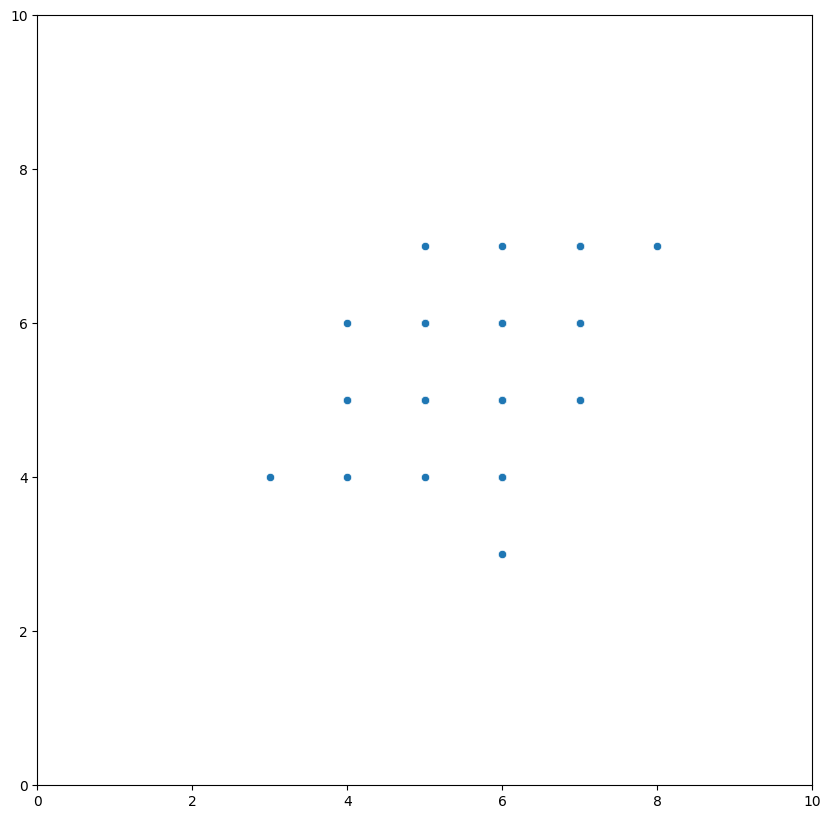

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=target_test.values * 1,y=arvore_decisao_test)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()
plt.savefig("Modelo_TreeClassifier_1.png", dpi=300, bbox_inches='tight')

In [17]:
quadrado_erro2 = mean_squared_error(target_test,arvore_decisao_test)
quadrado_erro2 * 100

51.24999999999999

In [18]:
r2_erro2 = r2_score(target_test,arvore_decisao_test)
r2_erro2

0.14561083615524895

arvore (4).png

In [19]:
tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)

graph.render("arvore", format="png")

'arvore.png'

#  Teste com o **DecisionTreeClassifier** 2

In [20]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    test_new_winered.drop(['quality'], axis=1),
    test_new_winered['quality'],
    test_size=0.10,
    random_state=1414)

In [21]:
model = DecisionTreeClassifier()
model = model.fit(predictors_train, target_train)
arvore_decisao_test1 = model.predict(predictors_test)

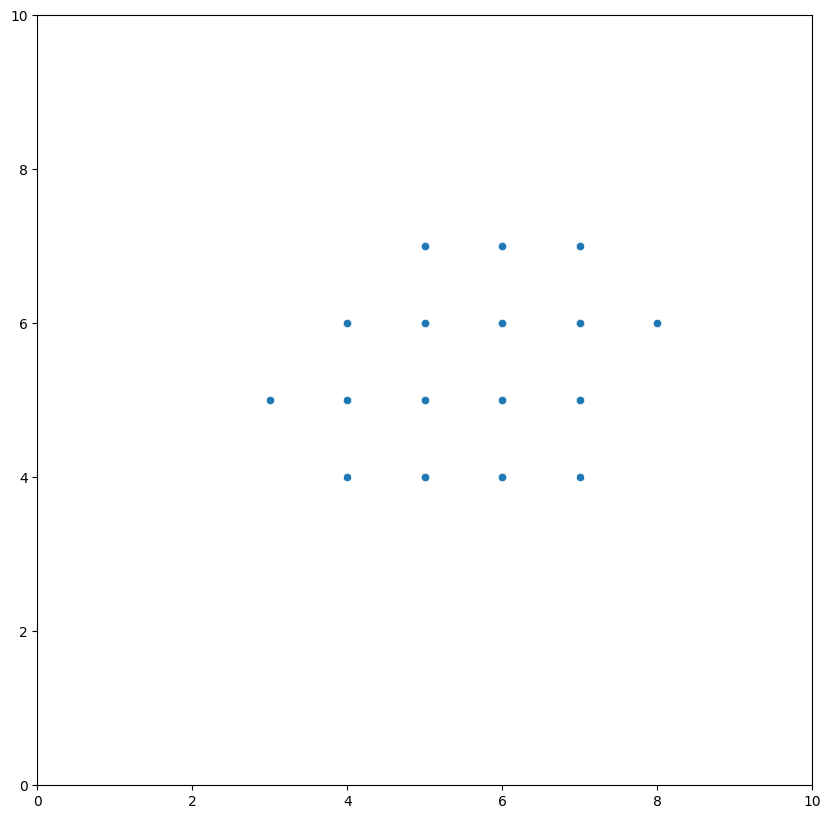

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=target_test.values * 1,y=arvore_decisao_test1)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()
plt.savefig("Modelo_TreeClassifier_2.png", dpi=300, bbox_inches='tight')

In [23]:
quadrado_erro3 = mean_squared_error(target_test,arvore_decisao_test)
quadrado_erro3 * 100

51.24999999999999

In [24]:
r2_erro3 = r2_score(target_test,arvore_decisao_test)
r2_erro3

0.14561083615524895

In [25]:
print('LinearRegression: Model 1')
print(f'mean_squared_error: {erro_quadrado * 100}')
print(f'r2_score: {r2_erro * 100}')
print('-----------------------------------')
print('LinearRegression: Model 2')
print(f'mean_squared_error: {erro_quadrado1 * 100}')
print(f'r2_score: {r2_erro1 * 100}')
print('-----------------------------------')
print('DecisionTreeClassifier: Model 1')
print(f'mean_squared_error: {quadrado_erro2 * 100}')
print(f'r2_score: {r2_erro2 * 100}')
print('-----------------------------------')
print('DecisionTreeClassifier: Model 2')
print(f'mean_squared_error: {quadrado_erro3 * 100}')
print(f'r2_score: {r2_erro3 * 100}')

LinearRegression: Model 1
mean_squared_error: 43.76543004103176
r2_score: 28.6561644143709
-----------------------------------
LinearRegression: Model 2
mean_squared_error: 96.41032657450816
r2_score: -30.338165726705355
-----------------------------------
DecisionTreeClassifier: Model 1
mean_squared_error: 51.24999999999999
r2_score: 14.561083615524895
-----------------------------------
DecisionTreeClassifier: Model 2
mean_squared_error: 51.24999999999999
r2_score: 14.561083615524895


# O modelo de **LinearRegression** é o com melhor resultado e podendo ser melhor usado, talvez com uma disponibilidade maior nos dados facilite isto.
